In [1]:
import awkward as ak
import hist
import numpy as np
import math
import pylhe
import matplotlib.pyplot as plt
import pyhepmc as hep

In [70]:
def calculate_pseudorapidity(px, py, pz):
    p = math.sqrt(px**2 + py**2 + pz**2)
    eta = 0.5 * math.log((p + pz) / (p - pz))
    return eta


def calculate_pt(px, py):
    p = np.array([px, py])
    pt = np.linalg.norm(p)
    return pt

def calculate_phi(px, py):
    phi = math.atan2(py, px)
    return phi

# SPS Cross Section for pp > tt > fully jet hadronic channel (CMS)

### only Pt cuts and Eta cuts

In [53]:


lhe_file_path = "/home/nima/Documents/MG5_aMC_v3_5_0/main_ppxtt_bb4j_madspin/Events/run_01_decayed_1/unweighted_events_decayed.lhe"

# Load the LHE file
events = pylhe.read_lhe(lhe_file_path)

# Define the cut conditions
jet_cut_1 = lambda jet: abs(jet.id) <= 5 and jet.status == 1
jet_cut_2 = lambda jet: calculate_pt(jet.px, jet.py) > 20 and abs(calculate_pseudorapidity(jet.px, jet.py, jet.pz)) < 2.4
jet_cut_3 = lambda jet: calculate_pt(jet.px, jet.py) > 30

# Define variables for cross-section calculation
total_cross_section = 0.0
cross_section_after_cuts = 0.0
total_events = 0
passed_cut_events = 0


# Iterate over the events
for event in events:
    total_events += 1
    
    # Count the number of jets that satisfy the first cut
    num_jets_cut_1 = sum(1 for jet in event.particles if jet_cut_1(jet))
    
    # Check if there are at least 6 jets in the final state
    if num_jets_cut_1 >= 6:
        # Count the number of jets that satisfy all cuts
        num_jets_cut_2 = sum(1 for jet in event.particles if jet_cut_1(jet) and jet_cut_2(jet))
        
        # Check if all six jets satisfy the cuts
        if num_jets_cut_2 == 6:
            cross_section_after_cuts += event.eventinfo.weight
            passed_cut_events += 1
    
    # Compute the total cross section
    total_cross_section += event.eventinfo.weight

    
# Calculate the average cross-section before the cut
average_cross_section_before_cut = total_cross_section / total_events

# Calculate the average cross-section after the cut
average_cross_section_after_cut = cross_section_after_cuts / total_events

    
# Print the results
print("Total events:", total_events)
print("Events passed the cuts:", passed_cut_events)
print("Total cross section before cuts: {0:.2f} pb".format(average_cross_section_before_cut))
print("Total cross section after cuts: {0:.2f} pb".format(average_cross_section_after_cut))





Total events: 10000
Events passed the cuts: 3339
Total cross section before cuts: 228.19 pb
Total cross section after cuts: 76.19 pb


### 4 jets Pt > 30 applied as well

In [54]:

lhe_file_path = "/home/nima/Documents/MG5_aMC_v3_5_0/main_ppxtt_bb4j_madspin/Events/run_01_decayed_1/unweighted_events_decayed.lhe"

# Load the LHE file
events = pylhe.read_lhe(lhe_file_path)

# Define the cut conditions
jet_cut_1 = lambda jet: abs(jet.id) <= 5 and jet.status == 1
jet_cut_2 = lambda jet: calculate_pt(jet.px, jet.py) > 20 and abs(calculate_pseudorapidity(jet.px, jet.py, jet.pz)) < 2.4
jet_cut_3 = lambda jet: calculate_pt(jet.px, jet.py) > 30

# Define variables for cross-section calculation
total_cross_section = 0.0
cross_section_after_cuts = 0.0
total_events = 0
passed_cut_events = 0


# Iterate over the events
for event in events:
    total_events += 1
    
    # Count the number of jets that satisfy the first cut
    num_jets_cut_1 = sum(1 for jet in event.particles if jet_cut_1(jet))
    
    # Check if there are at least 6 jets in the final state
    if num_jets_cut_1 >= 6:
        # Count the number of jets that satisfy all cuts
        num_jets_cut_2 = sum(1 for jet in event.particles if jet_cut_1(jet) and jet_cut_2(jet) and jet_cut_3(jet))
        
        # Check if all six jets satisfy the cuts
        if num_jets_cut_2 == 6:
            cross_section_after_cuts += event.eventinfo.weight
            passed_cut_events += 1
    
    # Compute the total cross section
    total_cross_section += event.eventinfo.weight

    
# Calculate the average cross-section before the cut
average_cross_section_before_cut = total_cross_section / total_events

# Calculate the average cross-section after the cut
average_cross_section_after_cut = cross_section_after_cuts / total_events

    
# Print the results
print("Total events:", total_events)
print("Events passed the cuts:", passed_cut_events)
print("Total cross section before cuts: {0:.2f} pb".format(average_cross_section_before_cut))
print("Total cross section after cuts: {0:.2f} pb".format(average_cross_section_after_cut))





Total events: 10000
Events passed the cuts: 1349
Total cross section before cuts: 228.19 pb
Total cross section after cuts: 30.78 pb


# SPS Cross Section for pp > bb (CMS)

In [59]:

lhe_file_path = "/home/nima/Documents/MG5_aMC_v3_5_0/main_ppxbb_0/Events/run_01/unweighted_events.lhe"

# Load the LHE file
events = pylhe.read_lhe(lhe_file_path)

# Define the cut condition
eta_cut = 2.4
pt_cut = 20
# Define the cross-section calculation variables
cross_section_sum_before_cut = 0.0
cross_section_sum_after_cut = 0.0
passing_events = 0
total_events = 0

# Iterate over the events
for event in events:
    total_events += 1
    # Check if all particles with abs(particle.id) <= 5 and particle.status == 1 pass the cut
    all_particles_pass_cut = True
    
    # Iterate over the particles in the event
    for particle in event.particles:
        # Check if the particle is a quark with abs(particle.id) <= 5 and particle.status == 1
        if abs(particle.id) == 5 and particle.status == 1:
            # Extract the relevant particle properties
            px = particle.px
            py = particle.py
            pz = particle.pz
            
            
            # Calculate pseudorapidity
            eta = calculate_pseudorapidity(px, py, pz)
            # Calculate pt
            pt = calculate_pt(px, py)
            
            # Check if the particle passes the pseudorapidity cut
            if pt < pt_cut or abs(eta) > eta_cut:
                all_particles_pass_cut = False
                break
    
    # If all particles pass the cut, increment the cross-section sum after the cut
    if all_particles_pass_cut:
        cross_section_sum_before_cut += event.eventinfo.weight
        cross_section_sum_after_cut += event.eventinfo.weight
        passing_events += 1
    else:
        # If any particle fails the cut, increment the cross-section sum before the cut
        cross_section_sum_before_cut += event.eventinfo.weight

# Calculate the average cross-section before the cut
average_cross_section_before_cut = cross_section_sum_before_cut / total_events

# Calculate the average cross-section after the cut
average_cross_section_after_cut = cross_section_sum_after_cut / total_events

# Print the results
print("Total number of events:", total_events)
print("Number of passing events:", passing_events)
print("cross-section before the cut: {0:.2f} pb ".format(average_cross_section_before_cut))
print("cross-section after the cut: {0:.2f} pb".format(average_cross_section_after_cut))


Total number of events: 10000
Number of passing events: 5882
cross-section before the cut: 2838063.60 pb 
cross-section after the cut: 1669349.01 pb


## anti-kT algorithm

In [63]:
import pylhe
import fastjet as fj

lhe_file_path = "/home/nima/Documents/MG5_aMC_v3_5_0/main_ppxbb_0/Events/run_01/unweighted_events.lhe"

# Load the LHE file
events = pylhe.read_lhe(lhe_file_path)

# Define the cut conditions
eta_cut = 2.4
pt_cut = 20

# Define the cross-section calculation variables
cross_section_sum_before_cut = 0.0
cross_section_sum_after_cut = 0.0
passing_events = 0
total_events = 0


# Iterate over the events
for event in events:
    total_events += 1
    all_particles_pass_cut = True
    particles = []
    
    # Iterate over the particles in the event
    for particle in event.particles:
        # Check if the particle is a quark with abs(particle.id) <= 5 and particle.status == 1
        if abs(particle.id) <= 5 and particle.status == 1:
            # Extract the relevant particle properties
            px = particle.px
            py = particle.py
            pz = particle.pz
            
            # Calculate pseudorapidity
            eta = calculate_pseudorapidity(px, py, pz)
            # Calculate pt
            pt = calculate_pt(px, py)
            
            # Check if the particle fails the pseudorapidity cut
            if pt < pt_cut or abs(eta) > eta_cut:
                all_particles_pass_cut = False
                break
            
            # Create a PseudoJet object for jet clustering
            p = fj.PseudoJet(px, py, pz, particle.e)
            particles.append(p)
    
    # Perform jet clustering using the anti-kT algorithm
    jet_def = fj.JetDefinition(fj.antikt_algorithm, 0.4)
    jet_selector = fj.SelectorPtMin(pt_cut) & fj.SelectorAbsEtaMax(eta_cut)
    jets = fj.sorted_by_pt(jet_selector(jet_def(particles)))
    
    # If all particles pass the cut and at least one jet is found, increment the cross-section sum after the cut
    if all_particles_pass_cut and len(jets) > 0:
        cross_section_sum_before_cut += event.eventinfo.weight
        cross_section_sum_after_cut += event.eventinfo.weight
        passing_events += 1
    else:
        # If any particle fails the cut or no jets are found, increment the cross-section sum before the cut
        cross_section_sum_before_cut += event.eventinfo.weight

# Calculate the average cross-section before the cut
average_cross_section_before_cut = cross_section_sum_before_cut / total_events

# Calculate the average cross-section after the cut
average_cross_section_after_cut = cross_section_sum_after_cut / total_events

# Print the results
print("Total number of events:", total_events)
print("Number of passing events:", passing_events)
print("cross-section before the cut: {0:.2f} pb".format(average_cross_section_before_cut))
print("cross-section after the cut: {0:.2f} pb".format(average_cross_section_after_cut))


Total number of events: 10000
Number of passing events: 5882
cross-section before the cut: 2838063.60 pb
cross-section after the cut: 1669349.01 pb


# SPS Cross Section for pp > tt >di-leptonic channel (CMS)

In [169]:


lhe_file_path = "/home/nima/Documents/MG5_aMC_v3_5_0/main_ppxtt_bb2l_madspin/Events/run_01_decayed_1/unweighted_events_decayed.lhe"

# Load the LHE file
events = pylhe.read_lhe(lhe_file_path)

# Initialize variables
total_events = 0
selected_events = 0
cross_section_before = 0
cross_section_after = 0

# Define jet clustering parameters
pt_cut = 20.0  # Minimum transverse momentum for jets
eta_cut = 2.4  # Maximum pseudorapidity for jets

pt_lcut = 25.0
eta_lcut = 2.4

DR = []
nb = 0
nl = 0
# Iterate over the events
for event in events:
    total_events += 1
    weight = event.eventinfo.weight
    cross_section_before += weight

    # Count the number of b quarks and opposite sign leptons
    B = []
    
    leptons = []

    for particle in event.particles:
        if abs(particle.id) == 5 and particle.status == 1 :  # Check if the particle is a b quark
            nb += 1
            B.append(particle)
        elif abs(particle.id) in (11, 13, 15) and particle.status == 1:  # Check if the particle is a lepton
            nl+=1
            leptons.append(particle)
    
    
    
    # Apply cuts for b: Pt > 20 and abs(eta) < 2.4
    selected_b = []
    for b in B:
        b_pt = calculate_pt(b.px, b.py)
        b_eta = calculate_pseudorapidity(b.px, b.py, b.pz)
        if b_pt > pt_cut and abs(b_eta) < eta_cut:
            selected_b.append(b)
    
    
    

            # Apply cuts for leptons: Pt > 25 and abs(eta) < 2.4
            selected_leptons = []
            for lepton in leptons:
                lepton_pt = calculate_pt(lepton.px, lepton.py)
                lepton_eta = calculate_pseudorapidity(lepton.px, lepton.py, lepton.pz)
                if lepton_pt > pt_lcut and abs(lepton_eta) < eta_lcut:
                    selected_leptons.append(lepton)
                
                # Apply cuts for Delat(R) > 0.4 between b-quarks and leptons
                excluded_event = False
                for bjet in selected_b:
                    bjet_eta = calculate_pseudorapidity(bjet.px, bjet.py, bjet.pz)
                    bjet_phi = calculate_phi(bjet.px, bjet.py)
                    for lep in  selected_leptons:
                        lep_eta = calculate_pseudorapidity(lep.px, lep.py, lep.pz)
                        lep_phi = calculate_phi(lep.px, lep.py)
                        delta_r = math.sqrt((bjet_eta - lep_eta) ** 2 + (bjet_phi - lep_phi) ** 2)
                        DR.append(delta_r)
                        if delta_r < 0.4:
                            excluded_event = True
                            break
                    if excluded_event:
                        break
    
    
    # Continue to other cuts if there are two b quarks and two opposite sign leptons
    if not excluded_event and len(selected_b) == 2 and len(selected_leptons) == 2:
        selected_events += 1
        cross_section_after += weight


# Show cross section before and after applying cuts
print("Total events: ", total_events)
print("Selected events: ", selected_events)
print("Cross section before cuts: {0:.2f} pb".format(cross_section_before/total_events))
print("Cross section after cuts: {0:.2f} pb ".format(cross_section_after/total_events))


Total events:  10000
Selected events:  3739
Cross section before cuts: 56.97 pb
Cross section after cuts: 21.30 pb 


Text(0, 0.5, 'Events')

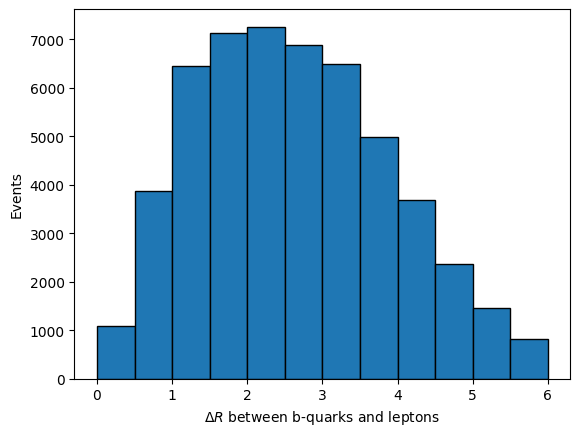

In [170]:
plt.hist(DR,  bins=12, range=(0, 6), edgecolor='black')
plt.xlabel(r'$\Delta R$ between b-quarks and leptons')
plt.ylabel('Events')

In [171]:
print(len(DR))
print(nb)
print(nl)

52694
20000
20000


# SPS Cross Section for pp > cc (CMS)

In [179]:

lhe_file_path = "/home/nima/Documents/MG5_aMC_v3_5_0/main_ppxcc_0/Events/run_01/unweighted_events.lhe"

# Load the LHE file
events = pylhe.read_lhe(lhe_file_path)

# Define the cut condition
eta_cut = 5
pt_cut = 20
# Define the cross-section calculation variables
cross_section_sum_before_cut = 0.0
cross_section_sum_after_cut = 0.0
passing_events = 0
total_events = 0

# Iterate over the events
for event in events:
    total_events += 1
    # Check if all particles with abs(particle.id) <= 5 and particle.status == 1 pass the cut
    all_particles_pass_cut = True
    
    # Iterate over the particles in the event
    for particle in event.particles:
        # Check if the particle is a quark with abs(particle.id) <= 5 and particle.status == 1
        if abs(particle.id) == 4 and particle.status == 1:
            # Extract the relevant particle properties
            px = particle.px
            py = particle.py
            pz = particle.pz
            
            
            # Calculate pseudorapidity
            eta = calculate_pseudorapidity(px, py, pz)
            # Calculate pt
            pt = calculate_pt(px, py)
            
            # Check if the particle passes the pseudorapidity cut
            if pt < pt_cut or abs(eta) > eta_cut:
                all_particles_pass_cut = False
                break
    
    # If all particles pass the cut, increment the cross-section sum after the cut
    if all_particles_pass_cut:
        cross_section_sum_before_cut += event.eventinfo.weight
        cross_section_sum_after_cut += event.eventinfo.weight
        passing_events += 1
    else:
        # If any particle fails the cut, increment the cross-section sum before the cut
        cross_section_sum_before_cut += event.eventinfo.weight

# Calculate the average cross-section before the cut
average_cross_section_before_cut = cross_section_sum_before_cut / total_events

# Calculate the average cross-section after the cut
average_cross_section_after_cut = cross_section_sum_after_cut / total_events

# Print the results
print("Total number of events:", total_events)
print("Number of passing events:", passing_events)
print("cross-section before the cut: {0:.2f} pb ".format(average_cross_section_before_cut))
print("cross-section after the cut: {0:.2f} pb".format(average_cross_section_after_cut))


Total number of events: 10000
Number of passing events: 5
cross-section before the cut: 4124900700.00 pb 
cross-section after the cut: 2062450.35 pb


# SPS Cross Section for pp > tt >semi-leptonic channel (CMS)

In [212]:


lhe_file_path = "/home/nima/Documents/MG5_aMC_v3_5_0/main_ppxtt_semi_madspin/Events/run_03_decayed_1/unweighted_events_decayed.lhe"

# Load the LHE file
events = pylhe.read_lhe(lhe_file_path)

# Initialize variables
total_events = 0
selected_events = 0
cross_section_before = 0
cross_section_after = 0

# Define jet clustering parameters
pt_cut = 20.0  # Minimum transverse momentum for jets
eta_cut = 2.5  # Maximum pseudorapidity for jets

pt_lcut = 30.0
eta_lcut = 2.4

DR = []
nb = 0
nl = 0
nj = 0
# Iterate over the events
for event in events:
    total_events += 1
    weight = event.eventinfo.weight
    cross_section_before += weight

    # Count the number of b quarks and opposite sign leptons
    B = []
    J = []
    leptons = []

    for particle in event.particles:
        if abs(particle.id) == 5 and particle.status == 1 :  # Check if the particle is a b quark
            nb += 1
            B.append(particle)
        if abs(particle.id) in (11, 13, 15) and particle.status == 1:  # Check if the particle is a lepton
            nl+=1
            leptons.append(particle)
        if abs(particle.id) in (1, 2, 3 , 4 , 5) and particle.status == 1:  # Check if the particle is a jet
            nj +=1
            J.append(particle)
    
    
    # Apply cuts for b: Pt > 20 and abs(eta) < 2.5
    selected_j = []
    for j in J:
        j_pt = calculate_pt(j.px, j.py)
        j_eta = calculate_pseudorapidity(j.px, j.py, j.pz)
        if j_pt > pt_cut and abs(j_eta) < eta_cut:
            selected_j.append(j)
    
    
            

            # Apply cuts for leptons: Pt > 30 and abs(eta) < 2.4
            selected_leptons = []
            for lepton in leptons:
                lepton_pt = calculate_pt(lepton.px, lepton.py)
                lepton_eta = calculate_pseudorapidity(lepton.px, lepton.py, lepton.pz)
                if lepton_pt > pt_lcut and abs(lepton_eta) < eta_lcut:
                    selected_leptons.append(lepton)
                
                # Apply cuts for Delat(R) > 0.4 between b-quarks and leptons
                excluded_event = False
                for bjet in selected_j:
                    bjet_eta = calculate_pseudorapidity(bjet.px, bjet.py, bjet.pz)
                    bjet_phi = calculate_phi(bjet.px, bjet.py)
                    for lep in  selected_leptons:
                        lep_eta = calculate_pseudorapidity(lep.px, lep.py, lep.pz)
                        lep_phi = calculate_phi(lep.px, lep.py)
                        delta_r = math.sqrt((bjet_eta - lep_eta) ** 2 + (bjet_phi - lep_phi) ** 2)
                        DR.append(delta_r)
                        if delta_r < 0.4:
                            excluded_event = True
                            break
                    if excluded_event:
                        break
    
    
    # Continue to other cuts if there are two b quarks and two opposite sign leptons
    if not excluded_event and len(selected_j) == 4 and len(selected_leptons) == 1:
        selected_events += 1
        cross_section_after += weight


# Show cross section before and after applying cuts
print("Total events: ", total_events)
print("Selected events: ", selected_events)
print("Cross section before cuts: {0:.2f} pb".format(cross_section_before/total_events))
print("Cross section after cuts: {0:.2f} pb ".format(cross_section_after/total_events))


Total events:  10000
Selected events:  3254
Cross section before cuts: 227.54 pb
Cross section after cuts: 74.04 pb 


Text(0, 0.5, 'Events')

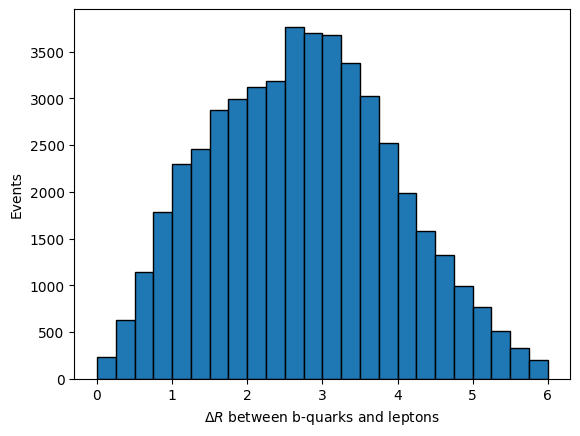

In [206]:
plt.hist(DR,  bins=24, range=(0, 6), edgecolor='black')
plt.xlabel(r'$\Delta R$ between jets and leptons')
plt.ylabel('Events')

In [207]:
print(nb)

20009


In [208]:
print(nj)

40000
